# Headers


In [1]:
import pandas as pd

In [2]:
from multi_objective_vehicle_routing_problem import *

# NDP


In [3]:
SEED = 30

In [4]:
random.seed(SEED)
np.random.seed(SEED)



NDP_MultiObjectiveVehicleRoutingProblem

SOLUTION 0
[[4, 2, 3, 1, 5]]
- Maximum length among trucks: 407.25796136719254
- Number of trucks used: 1


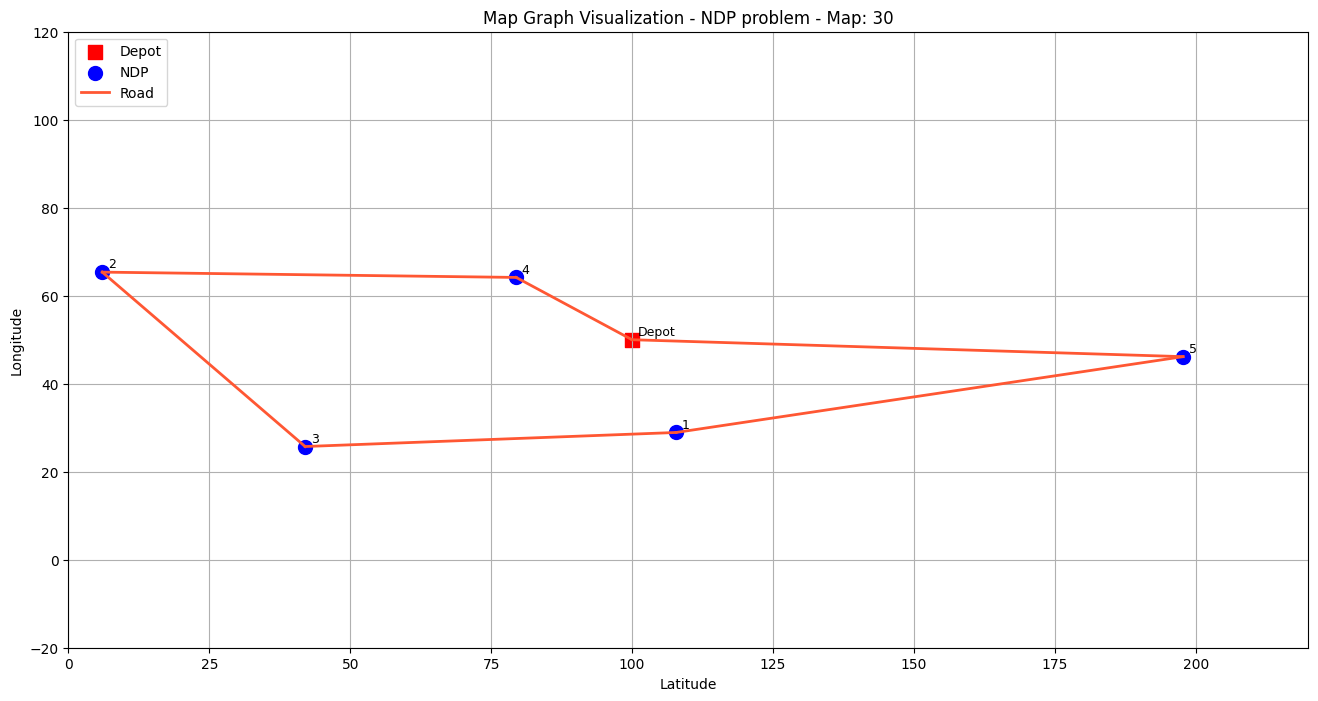

In [5]:
"""
NDP problem
"""

ndp_problem = NDP_MultiObjectiveVehicleRoutingProblem(
    number_of_ndp_customer=NUMBER_OF_NDP_CUSTOMER,
    range_of_ndp_customer=RANGE_OF_NDP_CUSTOMER,
)

# ndp_problem.visualize()

ndp_algorithm = NSGA2(
    pop_size=30,
    n_offsprings=10,
    sampling=CustomRandomSampling(NUMBER_OF_NDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSMutation(),
    eliminate_duplicates=True,
)

# Run the optimization
ndp_res = minimize(ndp_problem, ndp_algorithm, ("n_gen", 2000), verbose=False)

# Create solution handler
ndp_solution_handler = SolutionHandler(ndp_problem.get_map_graph())
ndp_solution_handler.set_result(ndp_res)
ndp_solution_handler.print_best_decoded_solutions(1)
ndp_solution_handler.visualize_solution("NDP problem")

In [6]:
len(ndp_solution_handler.get_best_decoded_solutions())

30

In [7]:
ndp_solution_handler.print_best_decoded_solutions()


SOLUTION 0
[[4, 2, 3, 1, 5]]
- Maximum length among trucks: 407.25796136719254
- Number of trucks used: 1

SOLUTION 1
[[5, 1, 3, 2, 4]]
- Maximum length among trucks: 407.25796136719254
- Number of trucks used: 1

SOLUTION 2
[[2], [1, 4, 3], [5]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 3
[[5], [2, 4], [3, 1]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 4
[[3, 2, 4], [5, 1]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 5
[[3, 2, 4], [1, 5]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 6
[[5], [1, 4, 3], [2]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 7
[[5], [2], [1, 4, 3]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 8
[[4, 2], [3, 1], [5]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 9
[[5

# Loop NDP problems


In [ ]:
file_name = "NDP_solution_seeds.txt"

for seed in range(10):
    random.seed(seed)
    np.random.seed(seed)
    print(f"\nSEED: {seed}")

    """
    NDP problem
    """
    ndp_problem = NDP_MultiObjectiveVehicleRoutingProblem(
        number_of_ndp_customer=NUMBER_OF_NDP_CUSTOMER,
        range_of_ndp_customer=RANGE_OF_NDP_CUSTOMER,
    )

    # ndp_problem.visualize()

    ndp_algorithm = NSGA2(
        pop_size=4000,
        n_offsprings=400,
        crossover=EXX(),
        mutation=OSMutation(),
        eliminate_duplicates=True,
    )

    # Run the optimization
    ndp_res = minimize(ndp_problem, ndp_algorithm, ("n_gen", 200), verbose=False)

    # Create solution handler
    ndp_solution_handler = SolutionHandler(ndp_problem.get_map_graph())
    ndp_solution_handler.set_result(ndp_res)
    ndp_solution_handler.print_best_decoded_solutions()
    # ndp_solution_handler.visualize_solution("NDP problem")

    # num_of_solution = len(ndp_solution_handler.get_best_decoded_solutions())

    # print(f"Seed: {seed}\tNDP solution: {num_of_solution}")

    # if num_of_solution > 100:
    #     with open(file_name, "a") as file:
    #         file.write(f"Seed: {seed}\tNDP solution: {num_of_solution}\n")

# print(f"Text written to {file_name} successfully!")


SEED: 0


NDP_MultiObjectiveVehicleRoutingProblem


# Independent HDP




Independent HDP_MultiObjectiveVehicleRoutingProblem

SOLUTION 0
[[3, 2, 7, 8, 1], [4, 9, 5, 10, 6]]
- Maximum length among trucks: 258.71269117280025
- Number of trucks used: 2


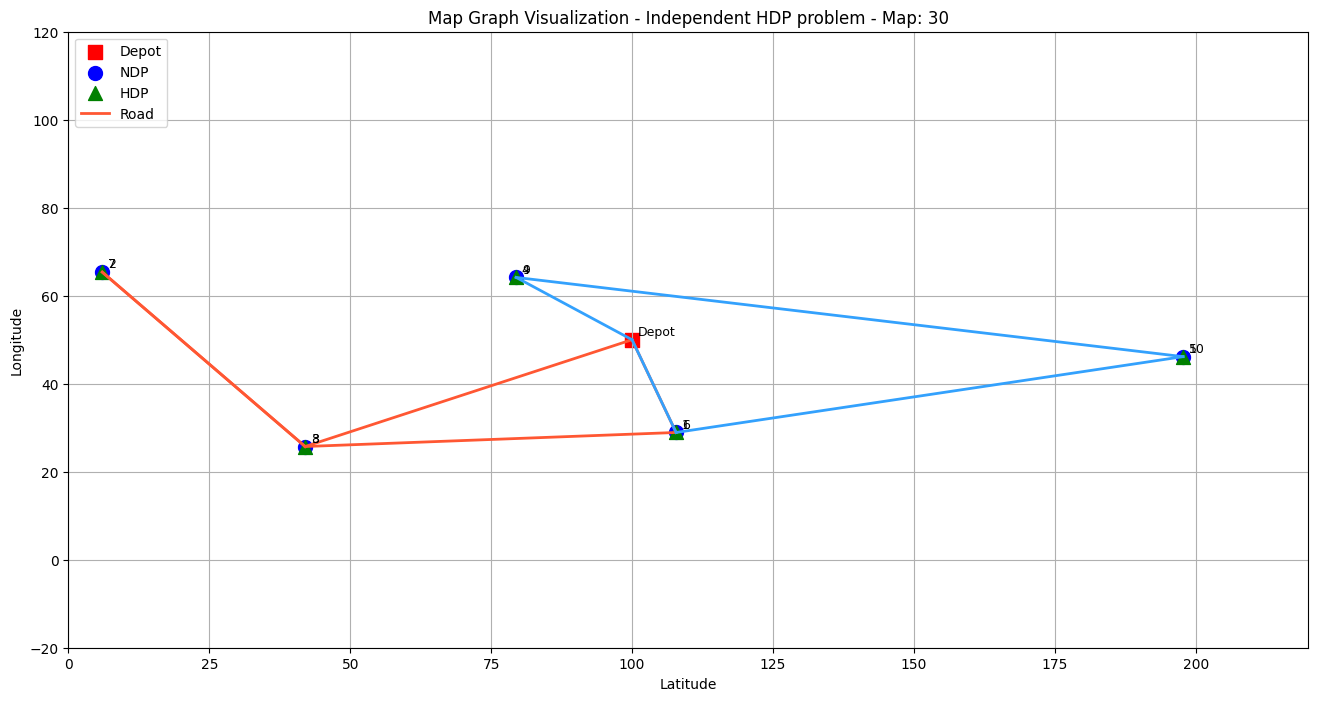

Similarity: 0.5714285714285714


In [ ]:
"""
HDP problem without solution from NDP (independent HDP problem)
"""

ind_hdp_problem = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
)

# ind_hdp_problem.visualize()

ind_hdp_algorithm = NSGA2(
    pop_size=30,
    n_offsprings=10,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSMutation(),
    eliminate_duplicates=True,
)

# Run the optimization
ind_hdp_res = minimize(
    ind_hdp_problem, ind_hdp_algorithm, ("n_gen", 200), verbose=False
)

# Create solution handler
ind_hdp_solution_handler = SolutionHandler(ind_hdp_problem.get_map_graph())
ind_hdp_solution_handler.set_result(ind_hdp_res)
ind_hdp_solution_handler.print_best_decoded_solutions(1)

ind_hdp_solution_handler.visualize_solution("Independent HDP problem")

ind_hdp_solution_handler.print_similarity(
    encoded_hdp_solution=ind_hdp_solution_handler.get_best_encoded_solutions(1)[0],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)

In [ ]:
ind_hdp_solution_handler.get_best_decoded_solutions()

[[[10, 5, 1, 6, 9, 3, 2, 7, 8, 4]],
 [[9, 4, 7, 2], [10, 5], [1, 8, 3, 6]],
 [[3, 2, 7, 8, 1], [4, 9, 5, 10, 6]]]

In [ ]:
len(ind_hdp_solution_handler.get_best_decoded_solutions())

3

# HDP-2F


In [8]:
"""
HDP problem with initial NDP solutions (2 objectives)
"""
dep_hdp_problem_2o = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=False,
)

# dep_hdp_problem_2o.visualize()

dep_hdp_algorithm_2o = NSGA2(
    pop_size=30,
    n_offsprings=10,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSMutation(),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_2o = minimize(
    dep_hdp_problem_2o, dep_hdp_algorithm_2o, ("n_gen", 2000), verbose=False
)

# Create solution handler
dep_hdp_solution_handler_2o = SolutionHandler(
    dep_hdp_problem_2o.get_map_graph()
)
dep_hdp_solution_handler_2o.set_result(dep_hdp_res_2o)
# dep_hdp_solution_handler_2o.print_best_decoded_solutions(1)

# dep_hdp_solution_handler_2o.visualize_solution(
#         "Dependent HDP problem - 2 objectives"
#     )

# dep_hdp_solution_handler_2o.print_similarity(
#     encoded_hdp_solution=dep_hdp_solution_handler_2o.get_best_encoded_solutions(
#         1
#     )[0],
#     encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
# )




Dependent HDP_MultiObjectiveVehicleRoutingProblem - 2 objectives


In [9]:
len(dep_hdp_solution_handler_2o.get_best_decoded_solutions())

30

In [10]:
dep_hdp_solution_handler_2o.get_best_decoded_solutions()

[[[6, 1, 7], [5], [2, 8], [10, 9], [4, 3]],
 [[3, 2, 4], [9, 1, 5], [7, 10, 8, 6]],
 [[3, 8, 10], [2], [5], [4, 9], [1, 7, 6]],
 [[10, 8, 3], [2], [5], [4, 9], [1, 7, 6]],
 [[8, 2], [5], [10, 9, 4], [3], [6, 1, 7]],
 [[9, 4, 6], [2, 8], [7, 3], [5], [10, 1]],
 [[8, 10], [5], [2], [6, 9, 1, 7], [4, 3]],
 [[9, 6, 10], [7], [5], [8, 2], [1, 3, 4]],
 [[10], [8, 2], [1, 4, 6, 9], [3, 7], [5]],
 [[7, 3], [1, 8], [2, 4], [10, 6, 9], [5]],
 [[9, 10, 8], [4, 3], [6, 1, 7], [2], [5]],
 [[3, 8, 10, 4], [5], [2], [9, 1, 7], [6]],
 [[8, 2], [5], [4, 9, 10], [3], [6, 1, 7]],
 [[8, 2], [4, 6], [5], [3, 10], [7, 9, 1]],
 [[2, 8], [5], [4, 9], [10, 3], [6, 1, 7]],
 [[5], [2, 10], [9, 6, 7, 1], [3, 8, 4]],
 [[5], [8, 3], [6, 1, 7], [2], [9, 4, 10]],
 [[3, 7, 1], [2], [6, 4], [9, 10, 8], [5]],
 [[1, 9, 6, 5, 3, 8, 10, 2, 4, 7]],
 [[3], [2], [5], [7, 1, 6], [8, 10, 9, 4]],
 [[3, 8], [5], [10, 9, 4], [2], [6, 1, 7]],
 [[4, 2], [10, 9, 1], [3, 7], [8, 6], [5]],
 [[5], [2], [10, 3], [8, 7], [4, 1, 9, 6]],
 [

# Other HDP

In [ ]:
dep_hdp_problem_3o = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=True,
)

# dep_hdp_problem_3o.visualize()

dep_hdp_algorithm_3o = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_3o = minimize(
    dep_hdp_problem_3o, dep_hdp_algorithm_3o, ("n_gen", 200), verbose=False
)

# Create solution handler
dep_hdp_solution_handler_3o = SolutionHandler(
    dep_hdp_problem_3o.get_map_graph()
)
dep_hdp_solution_handler_3o.set_result(dep_hdp_res_3o)
dep_hdp_solution_handler_3o.print_best_decoded_solutions(1)

dep_hdp_solution_handler_3o.visualize_solution(
        "Dependent HDP problem - 3 objectives"
    )

dep_hdp_solution_handler_3o.print_similarity(
    encoded_hdp_solution=dep_hdp_solution_handler_3o.get_best_encoded_solutions(
        1
    )[0],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)

dep_hdp_problem_2o_memetic = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=False,
)

# dep_hdp_problem_2o_memetic.visualize()

dep_hdp_algorithm_2o_memetic = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_2o_memetic = minimize(
    dep_hdp_problem_2o_memetic,
    dep_hdp_algorithm_2o_memetic,
    ("n_gen", 200),
    verbose=False,
)

# Create local search handler
dep_hdp_local_search_handler_2o_memetic = LocalSearchHandler(
    dep_hdp_problem_2o_memetic.get_map_graph()
)
dep_hdp_local_search_handler_2o_memetic.set_result(dep_hdp_res_2o_memetic)
dep_hdp_local_search_handler_2o_memetic.calculate_local_search(
    ndp_encoded_solution_list=ndp_solution_handler.get_best_encoded_solutions()
)

dep_hdp_local_search_handler_2o_memetic.print_best_decoded_solutions(1)

dep_hdp_local_search_handler_2o_memetic.visualize_solution(
        "Dependent HDP problem - 2 objectives - memetic"
    )

dep_hdp_local_search_handler_2o_memetic.print_similarity(
    encoded_hdp_solution=dep_hdp_local_search_handler_2o_memetic.get_best_encoded_solutions(
        1
    )[
        0
    ],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)


In [ ]:
ind_hdp_res = minimize(
    ind_hdp_problem, ind_hdp_algorithm, ("n_gen", 200), verbose=False
)

# Create solution handler
ind_hdp_solution_handler = SolutionHandler(ind_hdp_problem.get_map_graph())
ind_hdp_solution_handler.set_result(ind_hdp_res)
ind_hdp_solution_handler.print_best_decoded_solutions(1)

ind_hdp_solution_handler.visualize_solution("Independent HDP problem")

ind_hdp_solution_handler.print_similarity(
    encoded_hdp_solution=ind_hdp_solution_handler.get_best_encoded_solutions(1)[
        0
    ],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)

"""
HDP problem with initial NDP solutions (2 objectives)
"""
dep_hdp_problem_2o = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=False,
)

# dep_hdp_problem_2o.visualize()

dep_hdp_algorithm_2o = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_2o = minimize(
    dep_hdp_problem_2o, dep_hdp_algorithm_2o, ("n_gen", 200), verbose=False
)

# Create solution handler
dep_hdp_solution_handler_2o = SolutionHandler(
    dep_hdp_problem_2o.get_map_graph()
)
dep_hdp_solution_handler_2o.set_result(dep_hdp_res_2o)
dep_hdp_solution_handler_2o.print_best_decoded_solutions(1)

dep_hdp_solution_handler_2o.visualize_solution(
        "Dependent HDP problem - 2 objectives"
    )

dep_hdp_solution_handler_2o.print_similarity(
    encoded_hdp_solution=dep_hdp_solution_handler_2o.get_best_encoded_solutions(
        1
    )[0],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)

dep_hdp_problem_3o = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=True,
)

# dep_hdp_problem_3o.visualize()

dep_hdp_algorithm_3o = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_3o = minimize(
    dep_hdp_problem_3o, dep_hdp_algorithm_3o, ("n_gen", 200), verbose=False
)

# Create solution handler
dep_hdp_solution_handler_3o = SolutionHandler(
    dep_hdp_problem_3o.get_map_graph()
)
dep_hdp_solution_handler_3o.set_result(dep_hdp_res_3o)
dep_hdp_solution_handler_3o.print_best_decoded_solutions(1)

dep_hdp_solution_handler_3o.visualize_solution(
        "Dependent HDP problem - 3 objectives"
    )

dep_hdp_solution_handler_3o.print_similarity(
    encoded_hdp_solution=dep_hdp_solution_handler_3o.get_best_encoded_solutions(
        1
    )[0],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)

dep_hdp_problem_2o_memetic = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=False,
)

# dep_hdp_problem_2o_memetic.visualize()

dep_hdp_algorithm_2o_memetic = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_2o_memetic = minimize(
    dep_hdp_problem_2o_memetic,
    dep_hdp_algorithm_2o_memetic,
    ("n_gen", 200),
    verbose=False,
)

# Create local search handler
dep_hdp_local_search_handler_2o_memetic = LocalSearchHandler(
    dep_hdp_problem_2o_memetic.get_map_graph()
)
dep_hdp_local_search_handler_2o_memetic.set_result(dep_hdp_res_2o_memetic)
dep_hdp_local_search_handler_2o_memetic.calculate_local_search(
    ndp_encoded_solution_list=ndp_solution_handler.get_best_encoded_solutions()
)

dep_hdp_local_search_handler_2o_memetic.print_best_decoded_solutions(1)

dep_hdp_local_search_handler_2o_memetic.visualize_solution(
        "Dependent HDP problem - 2 objectives - memetic"
    )

dep_hdp_local_search_handler_2o_memetic.print_similarity(
    encoded_hdp_solution=dep_hdp_local_search_handler_2o_memetic.get_best_encoded_solutions(
        1
    )[
        0
    ],
    encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
)


# Visualization prep


## Helper functions


In [ ]:
def segment_customers_orders_by_cars(customers_orders):
    customers_by_cars_solutions = [
        np.array_split(customers_order, np.random.randint(1, len(customers_orders[0])+1)) for customers_order in customers_orders
    ]
    customers_by_cars_solutions = [
        [list(car + 1) for car in solution] for solution in customers_by_cars_solutions
    ]

    return customers_by_cars_solutions




In [ ]:
def find_edges_including_depot(solution):
    edges = []
    for car in solution:
        if len(car) == 0:
            continue
        edges.append([0, car[0]])
        if len(car) > 1:
            for i in range(len(car) - 1):
                edge = [car[i], car[i + 1]]
                edges.append(edge)
        edges.append([car[-1], 0])
    return edges

In [ ]:
def calulate_similarity_single_pair(hdp_edges, ndp_edges):
    # Initialize a counter for similar edges
    similar_count = 0
    
    # Convert edges to sets for easier comparison
    hdp_edges_set = set(map(tuple, hdp_edges))
    ndp_edges_set = set(map(tuple, ndp_edges))
    
    # Count the number of similar edges
    similar_count = len(hdp_edges_set.intersection(ndp_edges_set))
    
    return similar_count/len(ndp_edges)


In [ ]:
def caclculate_similarity_hdp_to_set_ndps(hdp_solution, ndp_solutions_set):
    hdp_edges = find_edges_including_depot(hdp_solution)
    ndp_solutions_edges = [find_edges_including_depot(ndp_solution) for ndp_solution in ndp_solutions_set]
    
    # Calculate similarities using list comprehension
    similarities = [calulate_similarity_single_pair(hdp_edges, ndp_edges) for ndp_edges in ndp_solutions_edges]
    max_similarity_index = np.argmax(similarities)
    max_similarity = similarities[max_similarity_index]
    corresponding_edge = ndp_solutions_edges[max_similarity_index]
    
    return max_similarity, corresponding_edge, hdp_edges

In [ ]:
distance_matrix_dep_hdp = dep_hdp_problem_2o.get_map_graph().distance_matrix
# distance_matrix_dep_hdp = pd.DataFrame(distance_matrix_dep_hdp)
distance_matrix_dep_hdp

array([[  0.        ,  60.30967754,  76.19647632,  94.90577534,
         18.17040223,  22.9768717 ,  46.59278948,  30.56182195,
         77.79884264,  50.39701736,  50.15986701],
       [ 60.30967754,   0.        ,  58.7864378 , 151.65098871,
         63.67950437,  73.38650874,  44.70864875,  67.72021728,
        133.25435851,  90.96642058,  73.59211018],
       [ 76.19647632,  58.7864378 ,   0.        , 167.37825266,
         91.14485498,  98.60747711,  93.82056105,  56.73228859,
        151.96613603,  67.8485267 , 116.06527653],
       [ 94.90577534, 151.65098871, 167.37825266,   0.        ,
         87.99105773,  78.27985598, 117.58354298, 111.33155918,
         18.97353629, 111.31584748,  92.42068211],
       [ 18.17040223,  63.67950437,  91.14485498,  87.99105773,
          0.        ,   9.71120688,  36.09751664,  48.7211908 ,
         69.58643048,  67.54500078,  32.36127622],
       [ 22.9768717 ,  73.38650874,  98.60747711,  78.27985598,
          9.71120688,   0.        ,  43.8

In [ ]:
dep_hdp_solution_handler_2o.get_best_decoded_solutions()

[[[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 2, 9, 1], [3, 8, 5, 10, 6, 4]],
 [[7, 2, 9, 1], [3, 8, 5, 10, 6, 4]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[5, 8, 3], [2, 9, 7, 4], [1, 10, 6]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 2, 9, 1], [3, 8, 5, 10, 6, 4]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 2, 9, 1], [3, 8, 5, 6, 10, 4]],
 [[7, 2, 9, 1], [3, 8, 5, 6, 10, 4]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[1, 6, 10, 5], [9, 2], [3, 4], [7, 8]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[5, 3, 8], [2, 1], [9], [6], [10, 7, 4]]]

In [ ]:
nested_list = dep_hdp_solution_handler_2o.get_best_decoded_solutions()

## Results


In [ ]:
results_dep = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_dep):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_dep.loc[i,'similarities'] = max_similarity
    results_dep.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_dep.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_dep

NameError: name 'hdp_customers_by_cars_dep' is not defined

In [ ]:
results_ind = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_ind):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_ind.loc[i,'similarities'] = max_similarity
    results_ind.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_ind.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_ind


,similarities,number of vehicles,max distance
0,0.333333,1.0,963.065703
1,0.777778,6.0,379.354460
2,0.714286,5.0,235.700567
3,0.625000,3.0,428.601254
4,0.888889,7.0,259.584368
...,...,...,...
95,0.333333,1.0,1192.919290
96,0.750000,5.0,353.301056
97,0.777778,6.0,319.653584
98,0.750000,4.0,401.078379


In [ ]:
results_3obj = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_3obj):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_3obj.loc[i,'similarities'] = max_similarity
    results_3obj.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_3obj.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_3obj


,similarities,number of vehicles,max distance
0,0.888889,8.0,220.611600
1,0.800000,7.0,346.267854
2,0.428571,1.0,892.884286
3,0.500000,3.0,540.302236
4,0.500000,2.0,530.302137
...,...,...,...
95,0.800000,7.0,240.076371
96,0.888889,7.0,247.708952
97,0.900000,9.0,220.611600
98,0.888889,7.0,353.831342


# 2F vs Independent


In [ ]:
average_dep = results_dep.groupby('number of vehicles').mean()
average_dep

,similarities,max distance
number of vehicles,,
1.0,0.476190,1075.629232
2.0,0.552381,639.027132
3.0,0.528628,486.742023
4.0,0.632021,407.845096
5.0,0.714286,354.316086
6.0,0.791171,326.230565
7.0,0.832576,307.827568
8.0,0.871605,282.821730
9.0,0.946875,277.749147


In [ ]:
average_ind = results_ind.groupby('number of vehicles').mean()
average_ind


,similarities,max distance
number of vehicles,,
1.0,0.420635,1039.046390
2.0,0.514550,635.739523
3.0,0.648810,437.524172
4.0,0.672619,399.393655
5.0,0.725088,311.767475
6.0,0.733560,344.072053
7.0,0.844444,289.338631
8.0,0.918326,302.878125
9.0,0.919444,244.728311


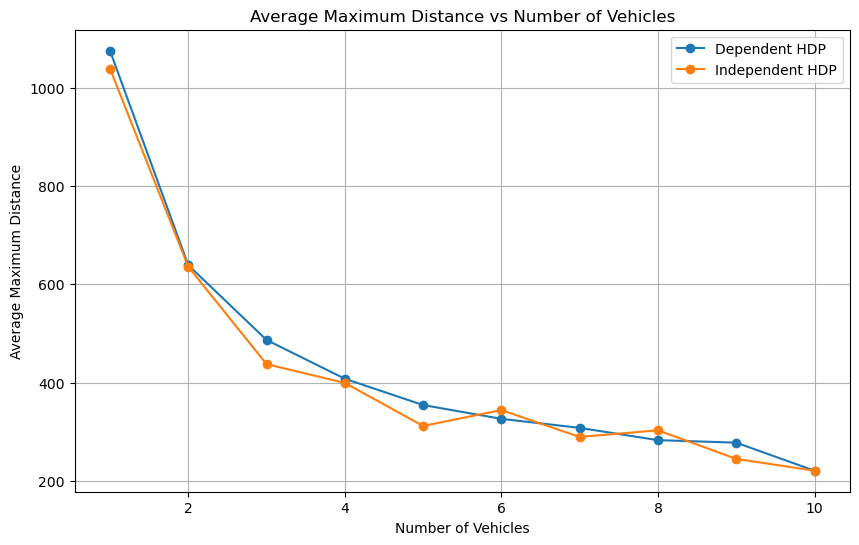

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['max distance'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(average_ind.index, average_ind['max distance'], label='Independent HDP', marker='o')

# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Maximum Distance')
plt.title('Average Maximum Distance vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

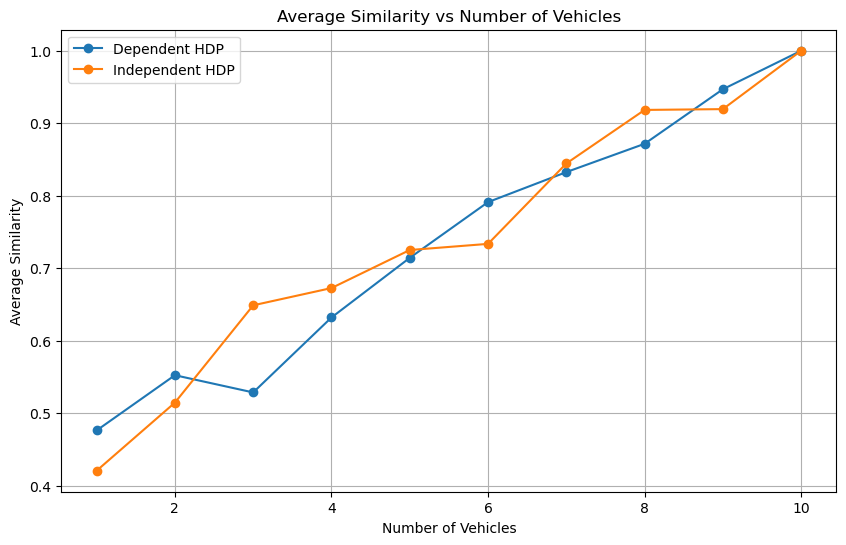

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['similarities'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(average_ind.index, average_ind['similarities'], label='Independent HDP', marker='o')

# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# 2F EMO 3 vs 2F EMO 2


In [ ]:
results_3obj

,similarities,number of vehicles,max distance
0,0.888889,8.0,220.611600
1,0.800000,7.0,346.267854
2,0.428571,1.0,892.884286
3,0.500000,3.0,540.302236
4,0.500000,2.0,530.302137
...,...,...,...
95,0.800000,7.0,240.076371
96,0.888889,7.0,247.708952
97,0.900000,9.0,220.611600
98,0.888889,7.0,353.831342


In [ ]:
# Get the index of the minimum similarity for each number of vehicles
min_similarity_indices = results_3obj.groupby('number of vehicles')['similarities'].idxmin()

# Retrieve the rows corresponding to those indices
min_similarity_3obj = results_3obj.loc[min_similarity_indices]
min_similarity_3obj = min_similarity_3obj.set_index('number of vehicles')
min_similarity_3obj

,similarities,max distance
number of vehicles,,
1.0,0.166667,1001.029444
2.0,0.500000,530.302137
3.0,0.428571,445.310374
4.0,0.500000,395.195515
5.0,0.625000,401.193546
6.0,0.666667,346.267854
7.0,0.700000,220.611600
8.0,0.800000,220.611600
9.0,0.900000,234.308745


In [ ]:
# Get the index of the maximum similarity for each number of vehicles
max_similarity_indices = results_3obj.groupby('number of vehicles')['similarities'].idxmax()

# Retrieve the rows corresponding to those indices
max_similarity_3obj = results_3obj.loc[max_similarity_indices]
max_similarity_3obj = max_similarity_3obj.set_index('number of vehicles')
max_similarity_3obj


,similarities,max distance
number of vehicles,,
1.0,0.571429,1028.263527
2.0,0.666667,516.618407
3.0,0.714286,542.479872
4.0,0.714286,353.831342
5.0,0.857143,353.831342
6.0,0.888889,353.301056
7.0,0.888889,247.708952
8.0,1.000000,225.857969
9.0,1.000000,221.711427


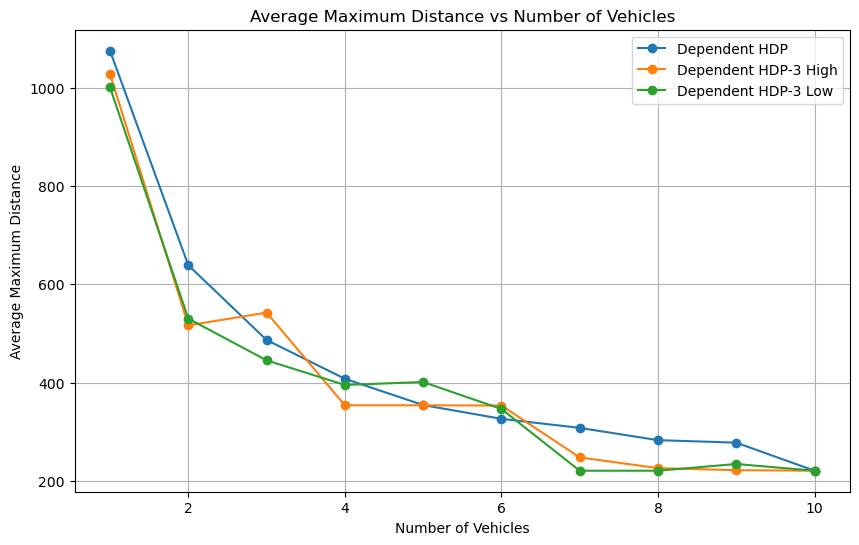

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['max distance'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(max_similarity_3obj.index, max_similarity_3obj['max distance'], label='Dependent HDP-3 High', marker='o')

plt.plot(min_similarity_3obj.index, min_similarity_3obj['max distance'], label='Dependent HDP-3 Low', marker='o')


# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Maximum Distance')
plt.title('Average Maximum Distance vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
# Get the index of the minimum distance for each number of vehicles
min_distance_indices = results_3obj.groupby('number of vehicles')['max distance'].idxmin()

# Retrieve the rows corresponding to those indices
min_distance_3obj = results_3obj.loc[min_distance_indices]
min_distance_3obj = min_distance_3obj.set_index('number of vehicles')
min_distance_3obj

,similarities,max distance
number of vehicles,,
1.0,0.428571,892.884286
2.0,0.666667,516.618407
3.0,0.666667,264.808244
4.0,0.571429,283.815110
5.0,0.714286,235.700567
6.0,0.777778,240.076371
7.0,0.750000,220.611600
8.0,0.888889,220.611600
9.0,0.900000,220.611600


In [ ]:
# Get the index of the maximum distance for each number of vehicles
max_distance_indices = results_3obj.groupby('number of vehicles')['max distance'].idxmax()

# Retrieve the rows corresponding to those indices
max_distance_3obj = results_3obj.loc[max_distance_indices]
max_distance_3obj = max_distance_3obj.set_index('number of vehicles')
max_distance_3obj

,similarities,max distance
number of vehicles,,
1.0,0.500000,1246.457766
2.0,0.500000,869.926577
3.0,0.500000,697.935404
4.0,0.625000,428.601254
5.0,0.714286,401.193546
6.0,0.666667,401.193546
7.0,0.875000,385.792462
8.0,0.888889,401.193546
9.0,1.000000,385.792462


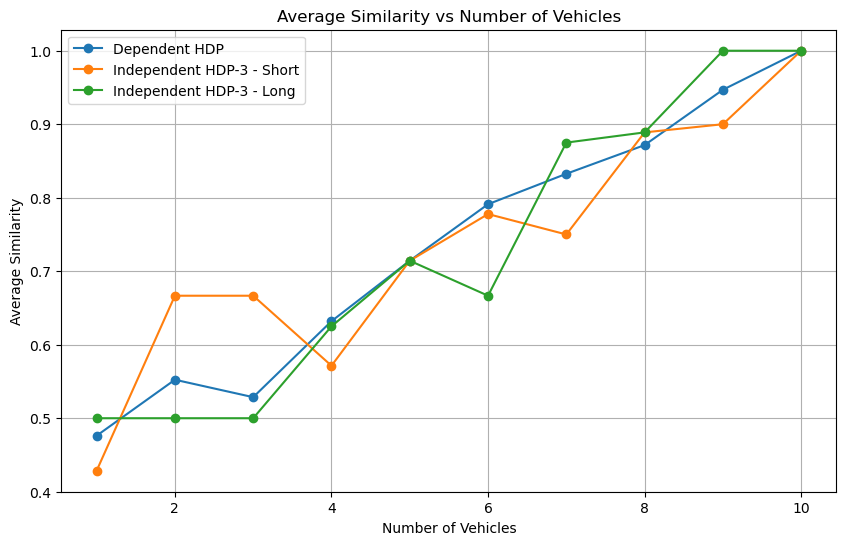

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['similarities'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(min_distance_3obj.index, min_distance_3obj['similarities'], label='Independent HDP-3 - Short', marker='o')

plt.plot(max_distance_3obj.index, max_distance_3obj['similarities'], label='Independent HDP-3 - Long', marker='o')


# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()